# Principal Component Analysis

## Wednesday January 20 2016

### Classification

In [29]:
'''

Classification and Regression Trees

'''
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


In [30]:
'''
Read, Explore, and Process data
'''

# Read in the data
titanic = pd.read_csv('../../data/titanic.csv')

# Take a  selection of the variables
d = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]



In [31]:
# Check for missing values in all columns
d.isnull().sum()
d.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.isnull().sum()) / d.groupby(['Sex', 'Pclass']).Age.count()

# Convert all variables to numeric so for scikit learn
d['Sex'] = np.where(d.Sex == 'female', 1, 0)

# Fill in missing values with the mean value (hint: use .fillna())
d['Age'] = d['Age'].fillna(d['Age'].mean())

# Explore the data to indtify trends in characteristics of survivors
d.Survived.value_counts()                    # How many people lived and died
d.Survived.mean()                            # The survival rate for everyone
d.groupby('Sex').Survived.mean()             # By Sex: women have higher survival rates
d.groupby('Pclass').Survived.mean()          # By Pclass: 1st class passengers have higher survival rates
d.groupby(['Sex', 'Pclass']).Survived.mean() # By Sex and Pclass: Women in the 1st and 2nd classes had the highest survival rates

# Create a proxy variable representing whether the Spouse was on board
d['Spouse'] = ((d.Age > 18) & (d.SibSp >= 1)).astype(int)
d.Spouse.value_counts()
d.groupby(['Pclass', 'Spouse']).Survived.mean() # Having a spouse appears to increase survival in the 1st class only




C:\Users\Angus\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Angus\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Angus\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

Pclass  Spouse
1       0         0.575342
        1         0.742857
2       0         0.473684
        1         0.470588
3       0         0.240786
        1         0.250000
Name: Survived, dtype: float64

In [32]:
'''

Split into training and test datasets, and build the model

'''

survived = d['Survived']
del d['Survived']

d


,Pclass,Sex,Age,SibSp,Parch,Spouse
0,3,0,22.000000,1,0,1
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,1
4,3,0,35.000000,0,0,0
5,3,0,29.699118,0,0,0
6,1,0,54.000000,0,0,0
7,3,0,2.000000,3,1,0
8,3,1,27.000000,0,2,0
9,2,1,14.000000,1,0,0


In [33]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(d,survived, random_state=1)

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)


# Create a feature vector
features = X_train.columns.tolist()

features


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Spouse']

In [34]:

# How to interpret the diagram?
ctree.classes_


array([0, 1], dtype=int64)

In [35]:
# Predict what will happen for 1st class woman
features
ctree.predict_proba([1, 1, 25, 0, 0, 0])
ctree.predict([1, 1, 25, 0, 0, 0])


array([1], dtype=int64)

In [36]:

# Predict what will happen for a 3rd class man
ctree.predict_proba([3, 0, 25, 0, 0, 0])
ctree.predict([3, 0, 25, 0, 0, 0])


array([0], dtype=int64)

In [37]:

# Which features are the most important?
ctree.feature_importances_

# Clean up the output
pd.DataFrame(zip(features, ctree.feature_importances_)).sort_index(by=1, ascending=False)

# Make predictions on the test set
preds = ctree.predict(X_test)

# Calculate accuracy
metrics.accuracy_score(y_test, preds)

# Confusion matrix
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])

# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)[:,1]

# Calculate the AUC metric
metrics.roc_auc_score(y_test, probs)

# Decision Trees have notorouisly high variance, so what can we do
# to better estimate the out of sample error of a high variance model?



C:\Users\Angus\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


0.77874177631578934

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# compare AUC using cross-validation
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(ctree, d, survived, cv=10, scoring='roc_auc').mean()


# so far logistic regression is winning..

'''

FINE-TUNING THE TREE

'''
from sklearn.grid_search import GridSearchCV


# check CV score for max depth = 3
ctree = tree.DecisionTreeClassifier(max_depth=3)
np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))

# check CV score for max depth = 10
ctree = tree.DecisionTreeClassifier(max_depth=10)
np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))


0.81393962679897347

In [11]:

# Conduct a grid search for the best tree depth
ctree = tree.DecisionTreeClassifier(random_state=1)
depth_range = range(1, 20)
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(d, survived)



GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

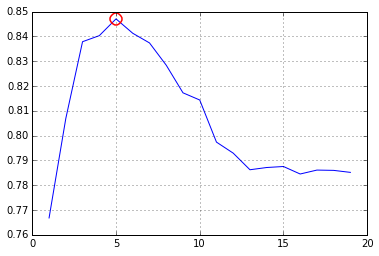

In [12]:

# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]


# Plot the results of the grid search
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [46]:

# Get the best estimator
best = grid.best_estimator_

cross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()


# Still not as good as Logistic Regression.. 
# Let's try something else



### EXERCISE ###
#''' Use Grid Search try scan over three parameters
#1. max_depth:     from 1 to 20
#2. criterion:     (either 'gini' or 'entropy')
#3. max_features : range (1,5)
#
#'''

ctree = tree.DecisionTreeClassifier(random_state=1,  criterion = "entropy")
depth_range = range(1, 20)
features_range = range(1, 5)
param_grid = dict(max_depth=depth_range, max_features=features_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(d, survived)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=0)

In [47]:
best = grid.best_estimator_

print cross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()
print cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()

0.854433056051
0.853902342755


In [52]:
import sklearn
import pydot
import os

from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Couldn't import dot_parser, loading of dot files will not be possible.


NameError: name 'StringIO' is not defined

### Regression

In [53]:
# Decision trees (like many other classification models)
# can also be used for regression!


drinks = pd.read_csv('../../data/drinks.csv', na_filter=False)

drinks

# Make dummy columns for each of the 6 regions
for continent_ in ['AS', 'NA', 'EU', 'AF', 'SA', 'OC']:
    drinks[continent_] = drinks['continent'] == continent_

drinks


del drinks['continent']
del drinks['country']
del drinks['total_litres_of_pure_alcohol'] # this doesn't seem fair does it?

X = drinks.drop('wine_servings', axis=1)
y = drinks['wine_servings']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


rtree = tree.DecisionTreeRegressor()

rtree.fit(X_train, y_train)
rtree.predict(X_test)

printscores = cross_val_score(rtree, X, y, cv=10, scoring='mean_squared_error')
mse_scores = -scores
mse_scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores
rmse_scores.mean()

wine_mean = y.mean()
wine_mean

features = X.columns
pd.DataFrame(zip(features, rtree.feature_importances_)).sort_index(by=1, ascending=False)



C:\Users\Angus\Anaconda2\lib\site-packages\ipykernel\__main__.py:42: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,0,1
0,beer_servings,0.421050
4,EU,0.342597
1,spirit_servings,0.180810
6,SA,0.030375
7,OC,0.019934
5,AF,0.004799
3,NA,0.000345
2,AS,0.000089
